# Train Test Split

For different proportion split for the train and test set.

What you should look for is 2 different kinds of effects.
1. As the sample size decreases the variance should increase. $SE = {\sigma \over \sqrt{N}}$
2. As the proportion of the training set increase the probability for models with high degrees of freedom also increases and therefore the probability of overfitting increses.

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph
from scipy import stats
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

graph.style.use('fivethirtyeight')

warnings.simplefilter('ignore')

In [2]:
x, y = load_breast_cancer(return_X_y=True)

# (Optional) Shrinking the size of the dataset
# x, _, y, _ = train_test_split(x, y, test_size=0.5)

print(f'N = {len(y)}')
print(f'p = {x.shape[1]}')
print('N >> p' if (x.shape[1] * 10) < len(x) else 'Overfitting is possible')

base_rate = max(y.mean(), 1-y.mean())
print(f'Base Rate: {base_rate}')

N = 569
p = 30
N >> p
Base Rate: 0.6274165202108963


In [3]:
n_repetitions = 5000

results = []
for test_size in tqdm(stats.uniform(0, 1).rvs(n_repetitions)):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    try:
        logit = LogisticRegression(solver='lbfgs')
        logit.fit(x_train, y_train)
    except ValueError:
        continue  # Skip if y_train only have 1 class
    
    results.append((test_size, logit.score(x_train, y_train), logit.score(x_test, y_test)))
results = pd.DataFrame(results, columns=['testSize', 'trainScore', 'testScore'])

display(results.sample(5))

100%|██████████| 5000/5000 [01:22<00:00, 60.74it/s]


,testSize,trainScore,testScore
2998,0.336228,0.965517,0.927083
3000,0.168237,0.953488,0.947917
4533,0.220331,0.943567,0.920635
245,0.465548,0.950658,0.939623
604,0.295273,0.955000,0.952663


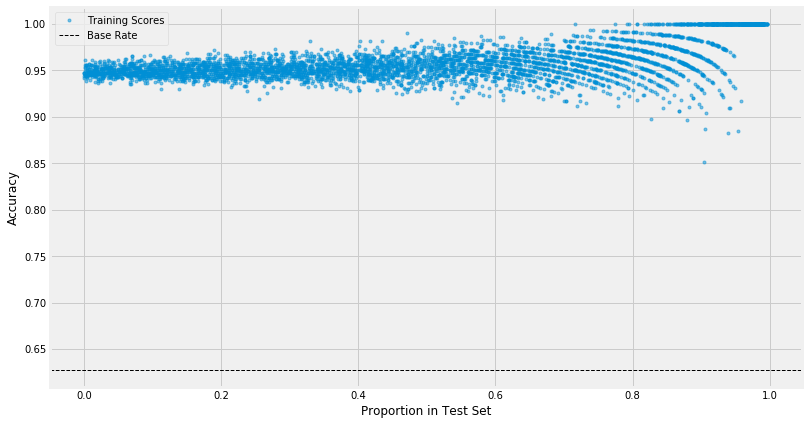

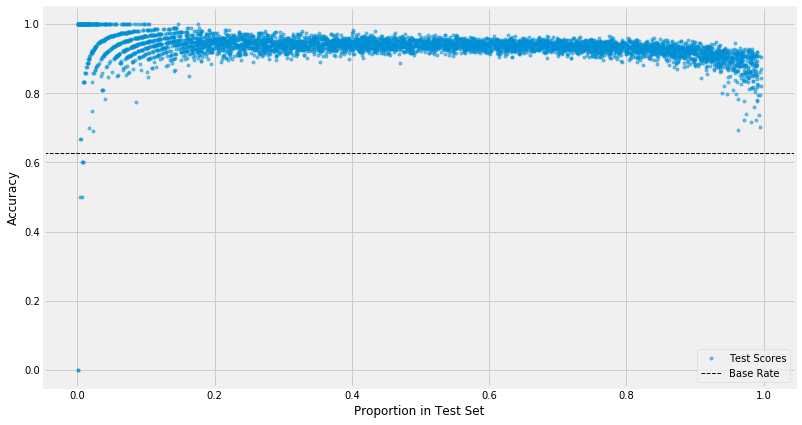

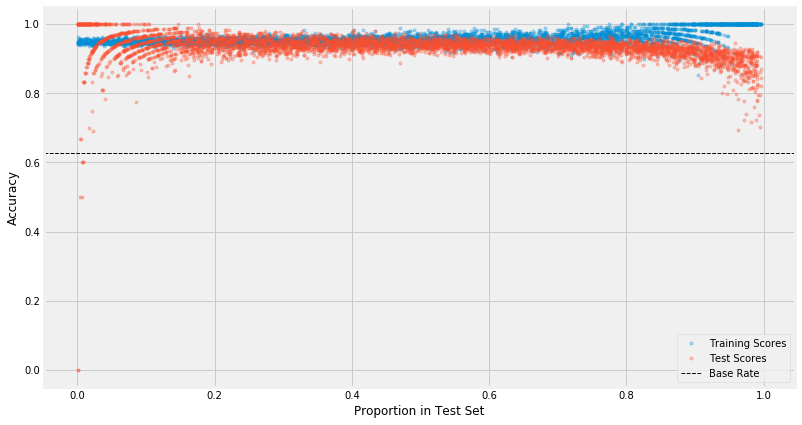

In [4]:
graph.figure(figsize=(12, 7))
graph.plot(results['testSize'], results['trainScore'], '.', alpha=0.5, label='Training Scores')
graph.axhline(base_rate, linestyle='--', linewidth=1, color='black', label='Base Rate')
graph.ylabel('Accuracy')
graph.xlabel('Proportion in Test Set')
graph.legend()
graph.show()

graph.figure(figsize=(12, 7))
graph.plot(results['testSize'], results['testScore'], '.', alpha=0.5, label='Test Scores')
graph.axhline(base_rate, linestyle='--', linewidth=1, color='black', label='Base Rate')
graph.ylabel('Accuracy')
graph.xlabel('Proportion in Test Set')
graph.legend()
graph.show()

graph.figure(figsize=(12, 7))
graph.plot(results['testSize'], results['trainScore'], '.', alpha=0.3, label='Training Scores')
graph.plot(results['testSize'], results['testScore'], '.', alpha=0.3, label='Test Scores')
graph.axhline(base_rate, linestyle='--', linewidth=1, color='black', label='Base Rate')
graph.ylabel('Accuracy')
graph.xlabel('Proportion in Test Set')
graph.legend()
graph.show()

_Stephen Anthony Rose_